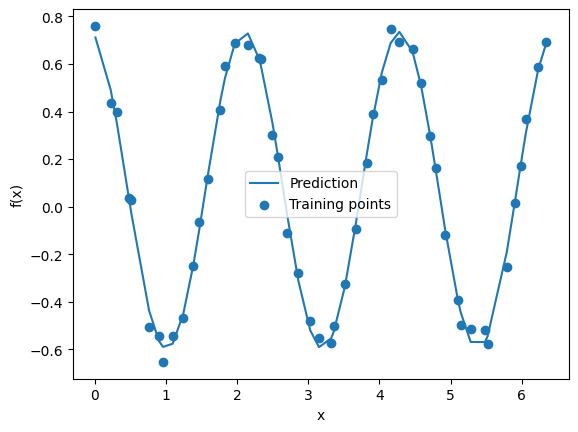

phi 6.514563321202882
f 2.8753241863541725
A 0.6658553947062511
B 0.06923907144737906


In [172]:
from qadence import (feature_map, hea, Z, QuantumModel, add, QuantumCircuit, 
                     kron, FeatureParameter, RX, RZ, VariationalParameter, RY,
                     chain, CNOT, X, Y, CRX, CRZ, I)
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import torch

def vqc_fit(n_qubits, n_epochs, aops = 2):
    n_qubits = 1
    x = FeatureParameter("x")
    f = VariationalParameter("f")
   
    fm =  RX(0, f*x) 

    theta = VariationalParameter("phi")
    ansatz =   RX(0, theta) 

    # As = [VariationalParameter(f"A1"), VariationalParameter(f"A2")]
    # obs = add(As[i]*Z(i) for i in range(n_qubits))
    obs = VariationalParameter("A")*Z(0) + VariationalParameter("B")*I(0)
    block = fm * ansatz

    circuit = QuantumCircuit(n_qubits, block)
    model = QuantumModel(circuit, observable = obs)

    criterion = torch.nn.MSELoss()
    x0 = [0.5, 0.5, 0.5, 0.5]

    res = minimize(loss_fn, x0 = x0, args = (x_train, y_train, model, criterion), method='Powell')
    model.reset_vparams(res.x)

    y_pred = model.expectation({"x": x_train}).squeeze().detach()

    return model, y_pred

def loss_fn(params, *args):
    x_train, y_train, model, criterion = args
    model.reset_vparams(torch.tensor(params))
    output = model.expectation({"x": x_train}).squeeze()
    loss = criterion(output, y_train)
    return loss.detach()

def data_from_file(path):
    with open(path, "r") as file:
        points = [tuple(map(float, line.split())) for line in file]

    x_train = torch.Tensor([point[0] for point in points])
    y_train = torch.Tensor([point[1] for point in points])
    return x_train, y_train

def plot(x_train, y_train, y_pred):
    plt.plot(x_train, y_pred, label = "Prediction")
    plt.scatter(x_train, y_train, label = "Training points")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

def scipy_verification(x_data, y_data):
    def model(x, A, f, phi, B):
        return A*np.cos(f*x + phi) + B
    
    params, covariance = curve_fit(model, x_data, y_data, p0=[3, 3, 3, 3])  
    Ae, fe, phie, Be = params
    print(f"Fitted Parameters: {Ae = }, {fe = }, {phie = }, {Be =}")
    plt.scatter(x_data, y_data, label="Data", color='red')
    plt.plot(x_data, model(x_data, *params), label="Fitted model", color='blue')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

quantum = True
show = True
x_train, y_train = data_from_file("datasets/dataset_2_b.txt")

if quantum: 
    n_qubits = 2
    model, y_pred = vqc_fit(n_qubits, n_epochs = 100)
    if show:
        plot(x_train, y_train, y_pred)
    vparams = model.vparams
    for p in ['phi', 'f', 'A', 'B']:
        print(p, vparams[p].item()+2*np.pi if p=='phi' else vparams[p].item())
else: 
    scipy_verification(x_train, y_train)

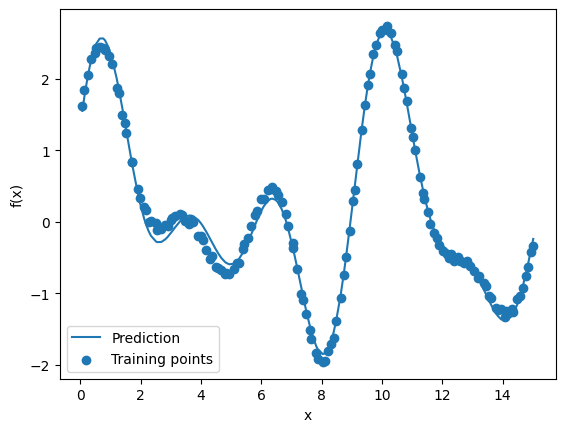

KeyError: 'theta'

In [171]:
from qadence import (feature_map, hea, Z, QuantumModel, add, QuantumCircuit, 
                     kron, FeatureParameter, RX, RZ, VariationalParameter, RY,
                     chain, CNOT, X, Y, CRX, CRZ, I)
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import torch

def vqc_fit(n_qubits, n_epochs, aops = 2):
    n_qubits = 3
    x = FeatureParameter("x")
    f_1 = VariationalParameter("f_1")
    f_2 = VariationalParameter("f_2")
    f_3 = VariationalParameter("f_3")
   
    
    fm = kron(RX(0, f_1*x),RX(1, f_2*x),RX(2, f_3*x))

    theta1 = VariationalParameter("theta1")
    theta2 = VariationalParameter("theta2")
    theta3 = VariationalParameter("theta2")
    a =  VariationalParameter("a")
    #ansatz = chain(RX(0, theta1), RX(1,theta2))

    #obs = add(Z(i)*a for i in range(n_qubits)) 

    #theta = VariationalParameter("phi")
    ansatz =  chain(RX(0, theta1), RX(1,theta2),RX(2,theta3))

    # As = [VariationalParameter(f"A1"), VariationalParameter(f"A2")]
    # obs = add(As[i]*Z(i) for i in range(n_qubits))
    obs = VariationalParameter("A")*Z(0) + VariationalParameter("A_1")*Z(1) +  VariationalParameter("A_2")*Z(2) + VariationalParameter("B")*I(0)
    block = fm * ansatz

    circuit = QuantumCircuit(n_qubits, block)
    model = QuantumModel(circuit, observable = obs)

    criterion = torch.nn.MSELoss()
    x0 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5]

    res = minimize(loss_fn, x0 = x0, args = (x_train, y_train, model, criterion), method='Powell')
    model.reset_vparams(res.x)

    y_pred = model.expectation({"x": x_train}).squeeze().detach()

    return model, y_pred

def loss_fn(params, *args):
    x_train, y_train, model, criterion = args
    model.reset_vparams(torch.tensor(params))
    output = model.expectation({"x": x_train}).squeeze()
    loss = criterion(output, y_train)
    return loss.detach()

def data_from_file(path):
    with open(path, "r") as file:
        points = [tuple(map(float, line.split())) for line in file]

    x_train = torch.Tensor([point[0] for point in points])
    y_train = torch.Tensor([point[1] for point in points])
    return x_train, y_train

def plot(x_train, y_train, y_pred):
    plt.plot(x_train, y_pred, label = "Prediction")
    plt.scatter(x_train, y_train, label = "Training points")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

def scipy_verification(x_data, y_data):
    def model(x, A, f, phi, B):
        return A*np.cos(f*x + phi) + B
    
    params, covariance = curve_fit(model, x_data, y_data, p0=[3, 3, 3, 3])  
    Ae, fe, phie, Be = params
    print(f"Fitted Parameters: {Ae = }, {fe = }, {phie = }, {Be =}")
    plt.scatter(x_data, y_data, label="Data", color='red')
    plt.plot(x_data, model(x_data, *params), label="Fitted model", color='blue')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

quantum = True
show = True
x_train, y_train = data_from_file("datasets/dataset_2_c.txt")

if quantum: 
    n_qubits = 3
    model, y_pred = vqc_fit(n_qubits, n_epochs = 100)
    if show:
        plot(x_train, y_train, y_pred)
    vparams = model.vparams
    for p in ['theta', 'f', 'A', 'B']:
        print(p, vparams[p].item()+2*np.pi if p=='phi' else vparams[p].item())
else: 
    scipy_verification(x_train, y_train)

